# Generating Dataset

In [1]:

'''
import cv2

cap = cv2.VideoCapture(0)

count1 = 250
count2 = 200
count3 = 200
count4 = 200
while(True):
    ret, frame = cap.read()
    cv2.imshow("Live Video", frame)


    if(cv2.waitKey(1) & 0xFF == ord('a')):
        count1 += 1
        cv2.imwrite(f"dataset/gesture_1/gesture_1_{count1}.jpg", frame)

    if(cv2.waitKey(1) & 0xFF == ord('b')):
        count2 += 1
        cv2.imwrite(f"dataset/gesture_2/gesture_2_{count2}.jpg", frame)

    if(cv2.waitKey(1) & 0xFF == ord('c')):
        count3 += 1
        cv2.imwrite(f"dataset/gesture_3/gesture_3_{count3}.jpg", frame)

    if(cv2.waitKey(1) & 0xFF == ord('d')):
        count4 += 1
        cv2.imwrite(f"dataset/gesture_4/gesture_4_{count4}.jpg", frame)

    if(cv2.waitKey(1) & 0xFF == ord('q')):
        cap.release()
        cv2.destroyAllWindows()
        break
'''

'\nimport cv2\n\ncap = cv2.VideoCapture(0)\n\ncount1 = 250\ncount2 = 200\ncount3 = 200\ncount4 = 200\nwhile(True):\n    ret, frame = cap.read()\n    cv2.imshow("Live Video", frame)\n\n\n    if(cv2.waitKey(1) & 0xFF == ord(\'a\')):\n        count1 += 1\n        cv2.imwrite(f"dataset/gesture_1/gesture_1_{count1}.jpg", frame)\n\n    if(cv2.waitKey(1) & 0xFF == ord(\'b\')):\n        count2 += 1\n        cv2.imwrite(f"dataset/gesture_2/gesture_2_{count2}.jpg", frame)\n\n    if(cv2.waitKey(1) & 0xFF == ord(\'c\')):\n        count3 += 1\n        cv2.imwrite(f"dataset/gesture_3/gesture_3_{count3}.jpg", frame)\n\n    if(cv2.waitKey(1) & 0xFF == ord(\'d\')):\n        count4 += 1\n        cv2.imwrite(f"dataset/gesture_4/gesture_4_{count4}.jpg", frame)\n\n    if(cv2.waitKey(1) & 0xFF == ord(\'q\')):\n        cap.release()\n        cv2.destroyAllWindows()\n        break\n'

# Save Files in CSV

In [2]:
import os
import csv

# Base directory where the dataset is stored
#base_dir = "dataset1"

base_dir = "dataset2"

# Output CSV file
output_csv = "images.csv"

# Open the CSV file for writing
with open(output_csv, mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    
    # Write the headers
    writer.writerow(["Path", "Label"])
    
    # Walk through the dataset directory
    for folder_name in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder_name)
        
        """# Ensure it's a folder
        if os.path.isdir(folder_path):
            label = folder_name  # Use folder name as the label
            if folder_name == "gesture_1":
                label = "checazzo"
            if folder_name == "gesture_2":
                label = "peace"
            if folder_name == "gesture_3":
                label = "nice"
            if folder_name == "gesture_4":
                label = "nogesture"
"""
        # Ensure it's a folder
        if os.path.isdir(folder_path):
            label = folder_name  # Use folder name as the label
            if folder_name == "gesture_1":
                label = "rock"
            if folder_name == "gesture_2":
                label = "paper"
            if folder_name == "gesture_3":
                label = "scissor"
            if folder_name == "gesture_4":
                label = "nogesture"

            
            # Loop through each file in the folder
            for file_name in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file_name)
                
                # Ensure it's an image file (check extension)
                if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    # Write the relative path and label to the CSV
                    writer.writerow([file_path, label])

print(f"Images and labels have been saved to {output_csv}")

Images and labels have been saved to images.csv


# Initialize functions

In [3]:
import os
import pandas as pd
import torchvision
import torch
from torchvision import transforms

import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torch.utils.data import Dataset
from torchvision.io import read_image
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import make_grid
from PIL import Image



class CustomImageDataset(Dataset):
    def __init__(self, root_dir,csv_file, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        #self.class_to_idx = {cls: idx for idx, cls in enumerate(
        #    ['checazzo', 'peace', 'nice', 'nogesture'])}
        self.class_to_idx = {cls: idx for idx, cls in enumerate(
            ['rock', 'paper', 'scissor', 'nogesture'])}
    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[idx, 0])
        image = Image.open(img_path)
        image = image.convert("L")


        label = self.annotations.iloc[idx, 1]
        label = self.class_to_idx[label]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

In [4]:
import cv2
import numpy as np
import random


class CustomTransform:
    def __init__(self):
        self.counter_rotation = 0
        self.counter_flipping = 0
        self.counter_blurring = 0
        self.counter_sharpening = 0
        self.counter_noise = 0
        self.counter_scale = 0

    def random_rotation(self, image):
        """Rotate the image by a random angle (90, 180, or 270 degrees)."""
        if image.shape[0] == 1:  # Grayscale: (1, H, W)
            image = np.squeeze(image, axis=0)  # Convert to (H, W)

        rows, cols = image.shape
        angle = random.choice([90, 180, 270])  # Randomly choose an angle
        M = cv2.getRotationMatrix2D((cols / 2.0, rows / 2.0), angle, 1)
        rotated = cv2.warpAffine(image, M, (cols, rows))

        rotated = np.expand_dims(rotated, axis=0)  # Convert back to (1, H, W)
        self.counter_rotation += 1
        return rotated

    def random_flipping(self, image):
        """Flip the image randomly."""
        if image.shape[0] == 1:  # Grayscale: (1, H, W)
            image = np.squeeze(image, axis=0)  # Convert to (H, W)

        flip_code = random.choice([-1, 0, 1])  # -1: both axes, 0: vertical, 1: horizontal
        flipped = cv2.flip(image, flip_code)

        flipped = np.expand_dims(flipped, axis=0)  # Convert back to (1, H, W)
        self.counter_flipping += 1
        return flipped

    def random_blurring(self, image):
        """Apply random Gaussian blur."""
        if image.shape[0] == 1:  # Grayscale: (1, H, W)
            image = np.squeeze(image, axis=0)  # Convert to (H, W)

        kernel_size = random.choice([3, 5, 7])  # Use smaller kernel sizes
        blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

        blurred = np.expand_dims(blurred, axis=0)  # Convert back to (1, H, W)
        self.counter_blurring += 1
        return blurred

    def random_sharpening(self, image):
        """Apply a sharpening kernel."""
        if image.shape[0] == 1:  # Grayscale: (1, H, W)
            image = np.squeeze(image, axis=0)  # Convert to (H, W)

        kernel = np.array([[-1, -1, -1],
                           [-1, 9, -1],
                           [-1, -1, -1]])
        sharpened = cv2.filter2D(image, -1, kernel)

        sharpened = np.expand_dims(sharpened, axis=0)  # Convert back to (1, H, W)
        self.counter_sharpening += 1
        return sharpened

    def add_random_noise(self, image):
        """Add random Gaussian noise."""
        if image.shape[0] == 1:  # Grayscale: (1, H, W)
            image = np.squeeze(image, axis=0)  # Convert to (H, W)

        row, col = image.shape
        mean = 0
        var = random.uniform(0.001, 0.005)
        sigma = var ** 0.5
        gauss = np.random.normal(mean, sigma, (row, col))
        noisy = image + gauss

        noisy = np.clip(noisy, 0, 255).astype(np.uint8)  # Ensure valid pixel range
        noisy = np.expand_dims(noisy, axis=0)  # Convert back to (1, H, W)
        self.counter_noise += 1
        return noisy

    def random_scaling(self, image):
        """Randomly scale the image and resize to (128, 128)."""
        if image.shape[0] == 1:  # Grayscale: (1, H, W)
            image = np.squeeze(image, axis=0)  # Convert to (H, W)

        scaling_zoom_factor = random.uniform(0.7, 1.5)
        scaled = cv2.resize(image, None, fx=scaling_zoom_factor, fy=scaling_zoom_factor, interpolation=cv2.INTER_LINEAR)
        scaled = cv2.resize(scaled, (128, 128))  # Resize back to (128, 128)

        scaled = np.expand_dims(scaled, axis=0)  # Convert back to (1, H, W)
        self.counter_scale += 1
        return scaled

    def __call__(self, image):
        """Apply a random combination of augmentations."""
        augmentations = [
            self.random_rotation,
            self.random_flipping,
            self.random_blurring,
            self.random_sharpening,
            self.add_random_noise,
        ]
        random.shuffle(augmentations)

        # Apply the first transformation from the shuffled list
        transformed = augmentations[0](image)
        # Apply scaling to ensure the final output is standardized
        scaled_transformed = self.random_scaling(transformed)

        return (
            transformed,
            scaled_transformed,
            self.counter_rotation,
            self.counter_flipping,
            self.counter_blurring,
            self.counter_sharpening,
            self.counter_noise,
            self.counter_scale,
        )


In [5]:
import os
import numpy as np
import torch
from PIL import Image
import random
import shutil

# Augment Dataset with Labels and Save Images
def augment_and_add_to_dataset(dataset, transform, num_augmentations=1, save_dir='augmented_dataset'):
    """
    Augment the dataset by applying transformations to each image
    and appending the augmented images with the same labels to the dataset.
    Saves the augmented images in class-specific directories.

    Args:
        dataset: The original dataset (CustomImageDataset or similar).
        transform: The transformation class with custom augmentation functions.
        num_augmentations: Number of augmented versions to create per image.
        save_dir: Root directory where augmented images will be saved.

    Returns:
        Augmented dataset (list of tuples with image tensor and label).
    """
    counter_rotation = 0
    counter_flipping = 0
    counter_blurring = 0
    counter_sharpening = 0
    counter_noise = 0
    counter_scaling = 0



    """   # Clear the directory if it exists
    if os.path.exists(save_dir):
        shutil.rmtree(save_dir)  # Delete everything inside the folder
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)  # Create the base directory for augmented dataset
    """
    augmented_data = []

    for idx in range(len(dataset)):
        image, label = dataset[idx]
        
        # Convert tensor back to numpy for transformation
        original_image = image.squeeze(0).numpy()
        #print(original_image.shape)
        # Add the original image and label
        augmented_data.append((image, label))

        # Create class-specific directory if it doesn't exist
        class_dir = os.path.join(save_dir, f'class_{label}')
        if not os.path.exists(class_dir):
            os.makedirs(class_dir)

        # Save the original image
        #save_image(original_image, class_dir, num_augmentations, 'original')

        # Create augmented versions and save them
        for i in range(num_augmentations):
            augmented_image, scaled, counter_rotation,counter_flipping, counter_blurring, counter_sharpening, counter_noise, counter_scaling = transform(original_image)
            augmented_image_tensor = torch.tensor(augmented_image)
            scaled = torch.tensor(scaled)
            # Save augmented image
            #save_image(augmented_image, class_dir,num_augmentations, f'aug_{i + 1}')
            #print(augmented_image.shape)
            augmented_data.append((augmented_image_tensor, label))
            augmented_data.append((scaled, label))

     # Apply only the first transformation from the shuffled list
    print("Counter rotation: ", counter_rotation)
    print("Counter flipping: ", counter_flipping)
    print("Counter blurring: ", counter_blurring)
    print("Counter sharpening: ", counter_sharpening)
    print("Counter noise: ", counter_noise)
    print("Counter scaling: ", counter_scaling)
    return augmented_data


def save_image(image, class_dir, num_augmentations, suffix):
    """
    Save the image to the specified directory with the given suffix.
    """
    
    # If the image has shape (channels, height, width), transpose to (height, width, channels)
    if image.ndim == 3 and image.shape[0] == 3:
        image = np.transpose(image, (1, 2, 0))
    
    # Convert to uint8 if necessary
    if image.dtype != np.uint8:
        image = (image * 255).astype(np.uint8)  # Scale to [0, 255] and convert to uint8

    #print(f"Processed image shape: {image.shape}, dtype: {image.dtype}")

    # Convert the numpy array to a PIL image
    pil_image = Image.fromarray(image)

    # Create a unique filename for each image
    filename = f"{suffix}_{random.randint(0, 1000)}.jpg"  # Adding randomness to avoid overwriting

    # Save the image in the class directory
    pil_image.save(os.path.join(class_dir, filename))





In [6]:
seed = 42
generator = torch.Generator().manual_seed(seed)

BATCH_SIZE = 64


current_dir = os.getcwd()
print(f"Current directory: {current_dir}")


#classes = ('checazzo', 'peace', 'nice', 'nogesture')

classes = ('rock', 'paper', 'scissor', 'nogesture')
# Set up transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)), # Resize the image to 32x32
    transforms.ToTensor(),  # Converts to tensor of shape [1, H, W]
    ])

# Instantiate custom transformation
custom_transform_100 = CustomTransform()
custom_transform_200 = CustomTransform()
custom_transform_300 = CustomTransform()

# Create dataset
original_dataset = CustomImageDataset(csv_file='images.csv', root_dir=os.getcwd(), transform=transform)
print(f"Original dataset size: {len(original_dataset)}")
# Split dataset into 80% train and 20% test
train_size_original = int(0.8 * len(original_dataset))
test_size_original = len(original_dataset) - train_size_original
train_set_original, test_set_original = random_split(original_dataset, [train_size_original, test_size_original],generator=generator)
# Create DataLoaders
train_loader_original = DataLoader(train_set_original, batch_size=BATCH_SIZE, shuffle=True)
test_loader_original = DataLoader(test_set_original, batch_size=BATCH_SIZE, shuffle=False)


# Augment the dataset by 100 images per class
num_augmentations_100 = 1  # Number of augmented versions per original image
dataset_100 = augment_and_add_to_dataset(train_set_original, custom_transform_100, num_augmentations_100, save_dir='augmented_dataset100')
print(f"Augmented dataset size: {len(dataset_100)}")
# Split dataset into 80% train and 20% 
train_size_100 = int(0.8 * len(dataset_100))
test_size_100 = len(dataset_100) - train_size_100
#train_set_100, test_set_100 = random_split(dataset_100, [train_size_100, test_size_100],generator=generator)
# Create DataLoaders
train_loader_100 = DataLoader(dataset_100, batch_size=BATCH_SIZE, shuffle=True)
#test_loader_100 = DataLoader(test_set_100, batch_size=32, shuffle=False)

# Augment the dataset by 200 images per class
num_augmentations_200 = 2  # Number of augmented versions per original image
dataset_200 = augment_and_add_to_dataset(train_set_original, custom_transform_200, num_augmentations_200, save_dir='augmented_dataset200')
print(f"Augmented dataset size: {len(dataset_200)}")
# Split dataset into 80% train and 20% test
train_size_200 = int(0.8 * len(dataset_200))
test_size_200 = len(dataset_200) - train_size_200
#train_set_200, test_set_200 = random_split(dataset_200, [train_size_200, test_size_200],generator=generator)
# Create DataLoaders
train_loader_200 = DataLoader(dataset_200, batch_size=BATCH_SIZE, shuffle=True)
#test_loader_200 = DataLoader(test_set_200, batch_size=32, shuffle=False)


# Augment the dataset by 300 images per class
num_augmentations_300 = 3  # Number of augmented versions per original image
dataset_300 = augment_and_add_to_dataset(train_set_original, custom_transform_300, num_augmentations_300, save_dir='augmented_dataset300')
print(f"Augmented dataset size: {len(dataset_300)}")
# Split dataset into 80% train and 20% test
train_size_300 = int(0.8 * len(dataset_300))
test_size_300 = len(dataset_300) - train_size_300
#train_set_300, test_set_300 = random_split(dataset_300, [train_size_300, test_size_300],generator=generator)
# Create DataLoaders
train_loader_300 = DataLoader(dataset_300, batch_size=BATCH_SIZE, shuffle=True)
#test_loader_300 = DataLoader(test_set_300, batch_size=32, shuffle=False)



Current directory: c:\Visual Computing\Project
Original dataset size: 564
Counter rotation:  87
Counter flipping:  98
Counter blurring:  94
Counter sharpening:  99
Counter noise:  73
Counter scaling:  451
Augmented dataset size: 1353
Counter rotation:  196
Counter flipping:  165
Counter blurring:  173
Counter sharpening:  180
Counter noise:  188
Counter scaling:  902
Augmented dataset size: 2255
Counter rotation:  256
Counter flipping:  253
Counter blurring:  287
Counter sharpening:  251
Counter noise:  306
Counter scaling:  1353
Augmented dataset size: 3157


torch.Size([1, 128, 128])


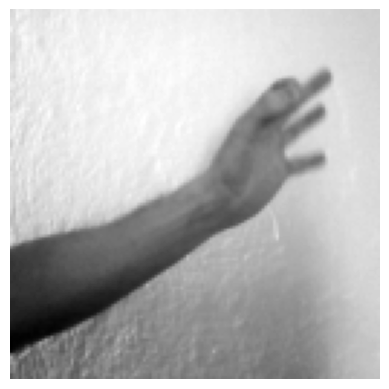

torch.Size([1, 128, 128])


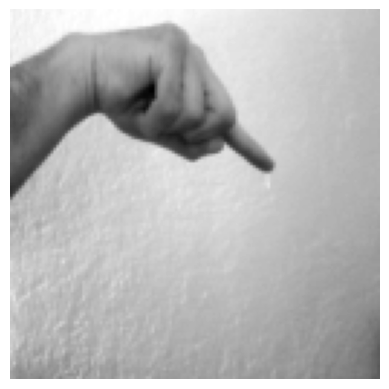

In [7]:
# Function to show images
"""def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()

    # Remove extra singleton dimensions (1, 1, 3, 32, 32) => (3, 32, 32)
    npimg = np.squeeze(npimg)  # Remove the extra singleton dimensions

    # If the image has 3 channels (RGB), we can directly display it
    if npimg.shape[0] == 3:
        npimg = np.transpose(npimg, (1, 2, 0))  # Transpose to (32, 32, 3) for RGB format

    plt.imshow(npimg)  # Show the image with RGB channels
    plt.show()
   """
import matplotlib.pyplot as plt
import numpy as np

# Function to show images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize (if normalized with mean=0.5, std=0.5)
    npimg = img.numpy()

    # Remove extra singleton dimensions (e.g., (1, 1, 32, 32) -> (1, 32, 32))
    npimg = np.squeeze(npimg)

    if len(npimg.shape) == 2:  # If the image is 2D (grayscale)
        plt.imshow(npimg, cmap='gray')
    elif len(npimg.shape) == 3 and npimg.shape[0] == 3:  # If the image has 3 channels (RGB)
        npimg = np.transpose(npimg, (1, 2, 0))  # Transpose to (H, W, 3) for RGB
        plt.imshow(npimg)
    else:
        raise ValueError("Unexpected image shape: {}".format(npimg.shape))

    plt.axis('off')  # Optional: Turn off the axis
    plt.show()
 

# Get some random training images

#dataset_iter = iter(train_loader_original)
#images, labels = next(dataset_iter)

"""# Loop through each image in the batch
for i, image in enumerate(images):
    print(f"Image {i + 1}")
    imshow(image)
    print(f"Label: {classes[labels[i].item()]}")"""
image, label = original_dataset[300]
print(image.shape)
imshow(image)


image_300, label = dataset_200[400]
print(image_300.shape)
imshow(image_300)

# CNN

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

##CNN Architecture

#Generally the CNN output size can be calculated as follows (for an image with same height and width dimensions):
#output_size = ((input_size - kernel_size + 2*padding) / stride) + 1

#Since we transform each image to grayscale we have 1 input channel.
# Also we use padding, because the most relevant informations lie in the center of the images.csv

#input size of each image: 128x128

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=5, padding=1) #output size = 124x124
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=5, padding=1) #output size = 60*60
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1) #output size = 30*30
        self.conv4 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=4, padding=1) #output size = 14*14
        #self.conv5 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        #self.conv6 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)

        # Pooling layer for downsampling
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Dropout layers for regularization
        self.dropout = nn.Dropout(0.5)


        # Fully connected layers
        self.fc1 = nn.Linear(64*7*7, 1000)
        self.fc2 = nn.Linear(1000, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 64)
        self.fc5 = nn.Linear(64, 4) #4 output classes 3 gestures and 1 for no gesture

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # output size = 62*62
        x = self.pool(F.relu(self.conv2(x))) # output size = 30*30
        x = self.pool(F.relu(self.conv3(x))) #output size = 15*15
        x = self.pool(F.relu(self.conv4(x))) # output size = 7*7

       # x = F.relu(self.conv5(x)) #output size = 8x8
       # x = self.pool(F.relu(self.conv6(x))) # output size = 4x4

        x = x.view(-1, 64*7*7)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = self.dropout(F.relu(self.fc4(x)))
        x = self.fc5(x) #no activation function because we use CrossEntropyLoss

        return x

In [9]:
#Hyperparameters
LEARNING_RATE = 0.001
EPOCHS = 50

# Check if the GPU is available
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

print(device)


model_original = Net()
optimizer_original = torch.optim.Adam(model_original.parameters(), lr=LEARNING_RATE)
criterion_original = nn.CrossEntropyLoss()


model_100 = Net()
optimizer_100 = torch.optim.Adam(model_100.parameters(), lr=LEARNING_RATE)
criterion_100 = nn.CrossEntropyLoss()


model_200 = Net()
optimizer_200 = torch.optim.Adam(model_200.parameters(), lr=LEARNING_RATE)
criterion_200 = nn.CrossEntropyLoss()


model_300 = Net()
optimizer_300 = torch.optim.Adam(model_300.parameters(), lr=LEARNING_RATE)
criterion_300 = nn.CrossEntropyLoss()




print(model_original)


cpu
Net(
  (conv1): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=3136, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=4, bias=True)
)


In [10]:
pip install torchsummary

Note: you may need to restart the kernel to use updated packages.


In [11]:
from torchsummary import summary

summary(model_original, (1, 128, 128)) # (channels, height, width of input image)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 8, 126, 126]             208
         MaxPool2d-2            [-1, 8, 63, 63]               0
            Conv2d-3           [-1, 16, 61, 61]           3,216
         MaxPool2d-4           [-1, 16, 30, 30]               0
            Conv2d-5           [-1, 32, 30, 30]           4,640
         MaxPool2d-6           [-1, 32, 15, 15]               0
            Conv2d-7           [-1, 64, 14, 14]          32,832
         MaxPool2d-8             [-1, 64, 7, 7]               0
            Linear-9                 [-1, 1000]       3,137,000
          Dropout-10                 [-1, 1000]               0
           Linear-11                  [-1, 512]         512,512
          Dropout-12                  [-1, 512]               0
           Linear-13                  [-1, 256]         131,328
          Dropout-14                  [

In [12]:

def train(model, train_loader, optimizer, criterion, n_epochs=None):
    model.train()
    losses = []
    for epoch in range(n_epochs):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(train_loader,0):
        
        #get the inputs; data is a list of [inputs, labels]
            inputs, labels = data[0].to(device), data[1].to(device)
            inputs = inputs.float()
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            loss_value = loss.item()
            losses.append(loss_value)
            running_loss += loss.item()
        print(f"Epoch {epoch + 1}, loss: {running_loss / len(train_loader)}")

    print('Finished Training')
    return losses


Epoch 1, loss: 1.3940892666578293
Epoch 2, loss: 1.386873871088028
Epoch 3, loss: 1.3887962996959686
Epoch 4, loss: 1.3865906596183777
Epoch 5, loss: 1.3847930431365967
Epoch 6, loss: 1.3426343947649002
Epoch 7, loss: 1.3739929348230362
Epoch 8, loss: 1.3267493546009064
Epoch 9, loss: 1.3093953430652618
Epoch 10, loss: 1.2960165143013
Epoch 11, loss: 1.2295338213443756
Epoch 12, loss: 1.1136690899729729
Epoch 13, loss: 1.433026909828186
Epoch 14, loss: 1.402745544910431
Epoch 15, loss: 1.2970717251300812
Epoch 16, loss: 1.311447560787201
Epoch 17, loss: 1.14652581512928
Epoch 18, loss: 1.0325150564312935
Epoch 19, loss: 1.056282326579094
Epoch 20, loss: 1.0259821712970734
Epoch 21, loss: 1.0067574009299278
Epoch 22, loss: 0.9709585458040237
Epoch 23, loss: 0.9207043051719666
Epoch 24, loss: 0.8852567821741104
Epoch 25, loss: 0.8300846442580223
Epoch 26, loss: 0.8603072389960289
Epoch 27, loss: 0.8649107813835144
Epoch 28, loss: 0.9116941839456558
Epoch 29, loss: 0.9253659322857857
Epoc

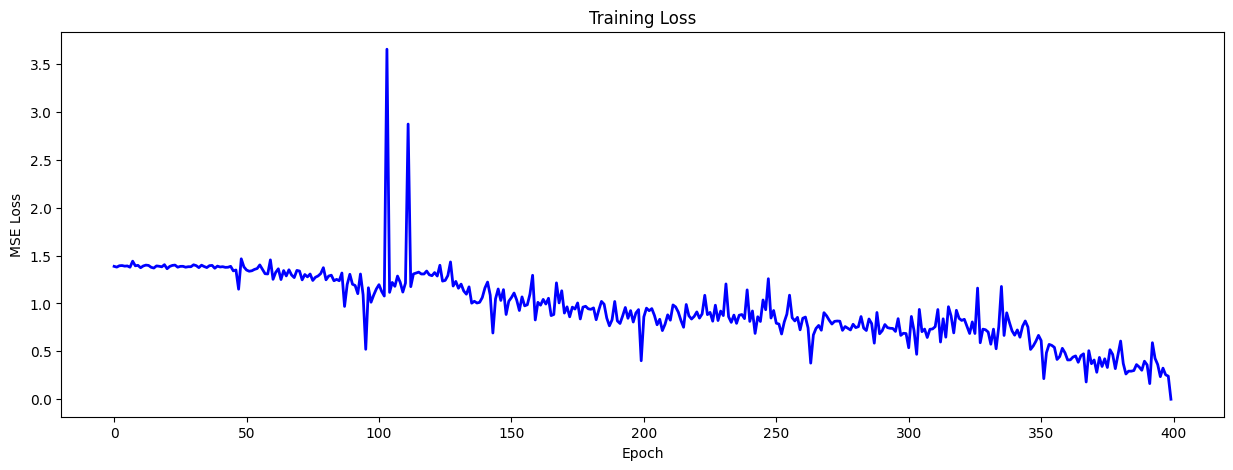

In [13]:
losses_original = train(model=model_original, train_loader=train_loader_original, optimizer=optimizer_original, criterion=criterion_original, n_epochs=EPOCHS)

plt.figure(figsize=(15, 5))
plt.plot(losses_original, lw=2,color='blue')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss')
plt.show()

# Save the trained model
PATH = './model_original.pth'
torch.save(model_original.state_dict(), PATH)

Epoch 1, loss: 1.377302960915999
Epoch 2, loss: 1.3640466765923933
Epoch 3, loss: 1.357656403021379
Epoch 4, loss: 1.2494097622958096
Epoch 5, loss: 1.167528141628612
Epoch 6, loss: 1.11341146718372
Epoch 7, loss: 1.0492271130735225
Epoch 8, loss: 1.0165910504081033
Epoch 9, loss: 0.9945389736782421
Epoch 10, loss: 0.9278028553182428
Epoch 11, loss: 0.883303477005525
Epoch 12, loss: 0.8685879355127161
Epoch 13, loss: 0.8628868677399375
Epoch 14, loss: 0.8040141517465765
Epoch 15, loss: 0.7740132050080732
Epoch 16, loss: 0.7038997493006967
Epoch 17, loss: 0.6449802016670053
Epoch 18, loss: 0.572097279808738
Epoch 19, loss: 0.5354341729120775
Epoch 20, loss: 0.5024767233566805
Epoch 21, loss: 0.44879165291786194
Epoch 22, loss: 0.35933286019346933
Epoch 23, loss: 0.30035540800202976
Epoch 24, loss: 0.29178573055700824
Epoch 25, loss: 0.2479527575725859
Epoch 26, loss: 0.22513181157410145
Epoch 27, loss: 0.17747523754157804
Epoch 28, loss: 0.17773357744921336
Epoch 29, loss: 0.19294240630

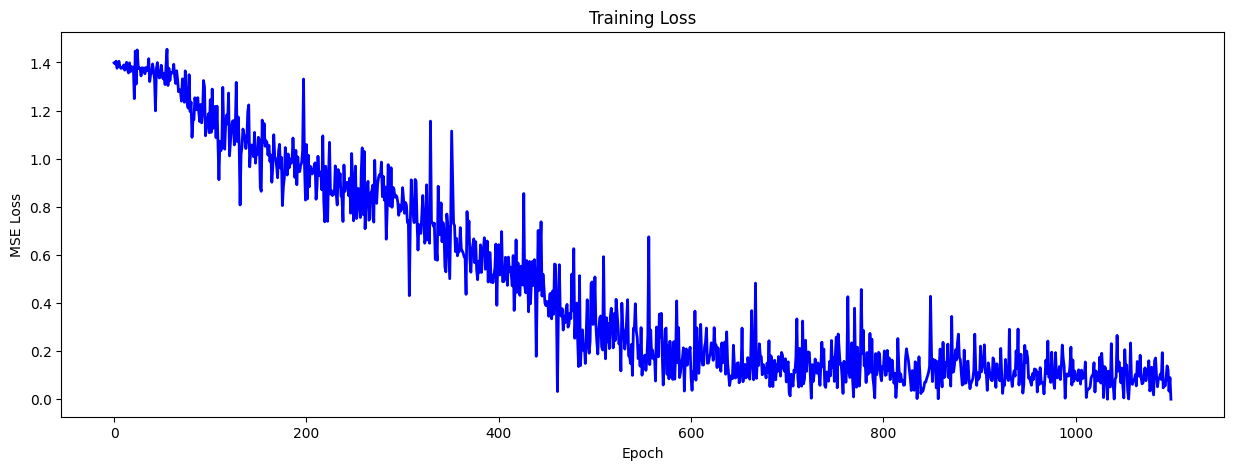

In [14]:
losses_100 = train(model=model_100, train_loader=train_loader_100, optimizer=optimizer_100, criterion=criterion_100, n_epochs=EPOCHS)

plt.figure(figsize=(15, 5))
plt.plot(losses_100, lw=2,color='blue')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss')
plt.show()

# Save the trained model
PATH = './model_100.pth'
torch.save(model_100.state_dict(), PATH)

Epoch 1, loss: 1.3802253637048933
Epoch 2, loss: 1.3639407323466406
Epoch 3, loss: 1.252570930454466
Epoch 4, loss: 1.1262088004085753
Epoch 5, loss: 1.064310188094775
Epoch 6, loss: 1.0043186677826776
Epoch 7, loss: 0.9672948867082596
Epoch 8, loss: 0.9206809732649062
Epoch 9, loss: 0.8713218354516559
Epoch 10, loss: 0.7633254677057266
Epoch 11, loss: 0.7019837382766936
Epoch 12, loss: 0.6049511556824049
Epoch 13, loss: 0.5475363847282197
Epoch 14, loss: 0.452950168814924
Epoch 15, loss: 0.3764755142231782
Epoch 16, loss: 0.3243197326858838
Epoch 17, loss: 0.302276517988907
Epoch 18, loss: 0.2517665885388851
Epoch 19, loss: 0.253953419211838
Epoch 20, loss: 0.2100953482505348
Epoch 21, loss: 0.17871533727480304
Epoch 22, loss: 0.17473241034895182
Epoch 23, loss: 0.16774477201720905
Epoch 24, loss: 0.14062486609650982
Epoch 25, loss: 0.14234437234052974
Epoch 26, loss: 0.1493211966007948
Epoch 27, loss: 0.18182254706819853
Epoch 28, loss: 0.167354183168047
Epoch 29, loss: 0.14817898606

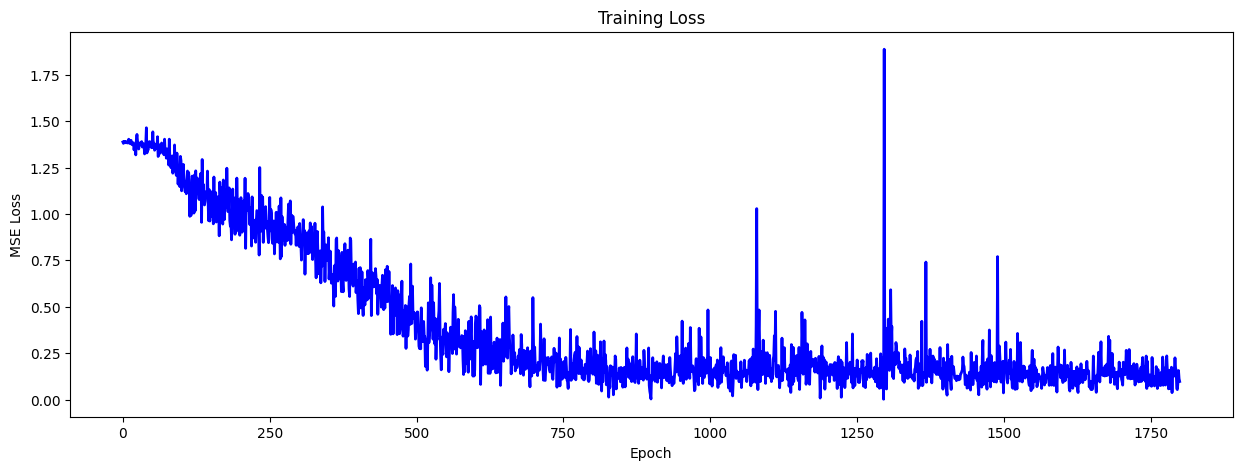

In [15]:
losses_200 = train(model=model_200, train_loader=train_loader_200, optimizer=optimizer_200, criterion=criterion_200, n_epochs=EPOCHS)

plt.figure(figsize=(15, 5))
plt.plot(losses_200, lw=2,color='blue')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss')
plt.show()

# Save the trained model
PATH = './model_200.pth'
torch.save(model_200.state_dict(), PATH)

Epoch 1, loss: 1.3854267311096191
Epoch 2, loss: 1.3681964778900146
Epoch 3, loss: 1.2814548265933992
Epoch 4, loss: 1.1227382981777192
Epoch 5, loss: 1.005145276784897
Epoch 6, loss: 0.9209404730796814
Epoch 7, loss: 0.8652010148763657
Epoch 8, loss: 0.7634098279476166
Epoch 9, loss: 0.6541534626483917
Epoch 10, loss: 0.5398903965950013
Epoch 11, loss: 0.4031502455472946
Epoch 12, loss: 0.33210492998361585
Epoch 13, loss: 0.2678330272436142
Epoch 14, loss: 0.24569559141993522
Epoch 15, loss: 0.2203651674091816
Epoch 16, loss: 0.23083780750632285
Epoch 17, loss: 0.19699585922062396
Epoch 18, loss: 0.20957933202385903
Epoch 19, loss: 0.21153722688555718
Epoch 20, loss: 0.17869462475180625
Epoch 21, loss: 0.164768440797925
Epoch 22, loss: 0.16391611590981484
Epoch 23, loss: 0.19063104301691056
Epoch 24, loss: 0.1688156444579363
Epoch 25, loss: 0.16262184657156467
Epoch 26, loss: 0.17678214877843856
Epoch 27, loss: 0.17326462268829346
Epoch 28, loss: 0.14986395239830017
Epoch 29, loss: 0.

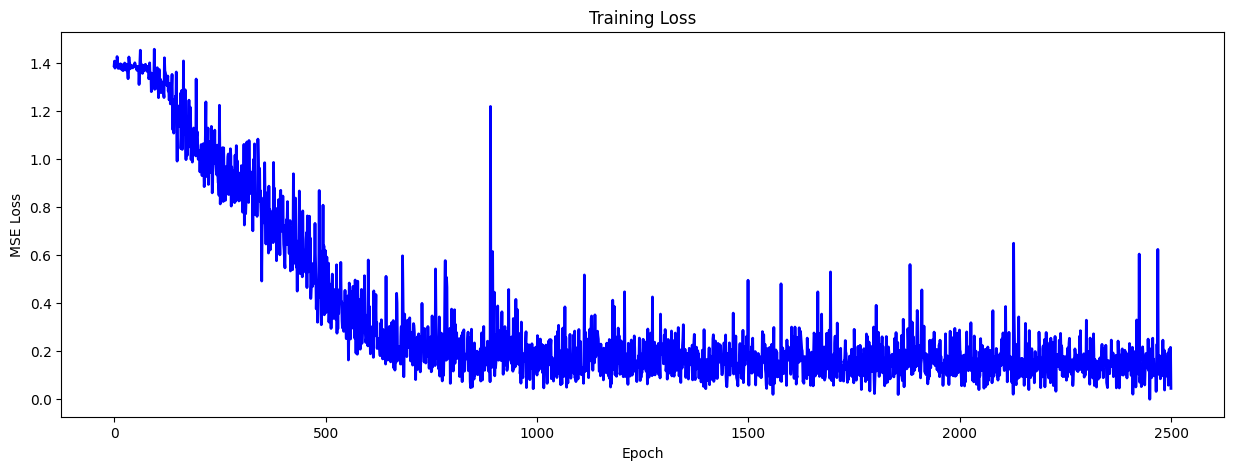

In [16]:
losses_300 = train(model=model_300, train_loader=train_loader_300, optimizer=optimizer_300, criterion=criterion_300, n_epochs=EPOCHS)

plt.figure(figsize=(15, 5))
plt.plot(losses_300, lw=2,color='blue')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss')
plt.show()

# Save the trained model
PATH = './model_300.pth'
torch.save(model_300.state_dict(), PATH)

C:\Users\gabri\AppData\Local\Temp\ipykernel_25268\3775393825.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_original.load_state_dict(torch.load('model_original.pt

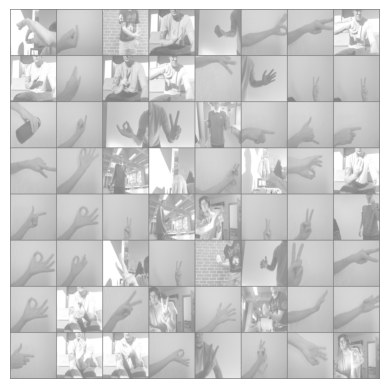

In [17]:
model_original.load_state_dict(torch.load('model_original.pth'))

# Check the testset
dataiter = iter(test_loader_original)
images, labels = next(dataiter)
images = images.to(device)
labels = labels.to(device)

# print images
imshow(torchvision.utils.make_grid(images.cpu()))


# Resnet

In [24]:
from torchvision import models
import torch
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"
num_classes = 4  # For CIFAR-10

# Load ResNet18
model_resnet = models.resnet18(pretrained=True).to(device)


# Modify the first convolutional layer to accept 1 channel instead of 3
# Get the original first convolutional layer
original_conv1 = model_resnet.conv1

# Create a new convolutional layer with 1 input channel
model_resnet.conv1 = nn.Conv2d(
    in_channels=1,  # Grayscale images have 1 channel
    out_channels=original_conv1.out_channels,
    kernel_size=original_conv1.kernel_size,
    stride=original_conv1.stride,
    padding=original_conv1.padding,
    bias=original_conv1.bias is not None
)

# Copy the pretrained weights from the original convolutional layer
if original_conv1.weight.shape[1] == 3:  # If using pretrained RGB weights
    model_resnet.conv1.weight.data = original_conv1.weight.data.mean(dim=1, keepdim=True)

# Optional: If you're training from scratch, the weights will be initialized randomly

# Verify the model
print(model_resnet)




ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [25]:
# Prevent the trained weights from being modified
for name, param in model_resnet.named_parameters():
  if 'fc' not in name: # Adjust this condition to target specific layers if needed
    param.requires_grad = False


# Compute the input feature size for the first fc layer
num_ftrs_resnet = model_resnet.fc.in_features
print(num_ftrs_resnet)

# Create a new set of fc layers
classifier = [
    nn.Linear(in_features=num_ftrs_resnet, out_features=256).to(device),
    nn.ReLU(inplace=True).to(device),
    nn.Dropout(p=0.3, inplace=False).to(device),
    nn.Linear(in_features=256, out_features=4, bias=True).to(device)
]

model_resnet.fc = nn.Sequential(*classifier).to(device) # Replace the model classifier

512


In [26]:
criterion_resnet = nn.CrossEntropyLoss()
optimizer_resnet = torch.optim.Adam(model_resnet.parameters(), lr=0.01)

In [27]:
def train_resnet(model_resnet, train_loader, optimizer_resnet, criterion, n_epochs):
    losses = []
    for epoch in range(n_epochs):  # loop over the dataset multiple times

        running_loss = 0.0
                    
        for i, data in enumerate(train_loader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data[0].to(device), data[1].to(device)
            inputs = inputs.float()

            # zero the parameter gradients
            optimizer_resnet.zero_grad()

            # forward + backward + optimize
            outputs = model_resnet(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer_resnet.step()

            losses.append(loss.item())
            # print statistics
            running_loss += loss.item()
        print(f"Epoch {epoch + 1}, loss: {running_loss / len(train_loader)}")
    return losses 

In [28]:
# Check the accuracy of the finetuned network on the test set
def test_resnet(model_resnet, test_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data[0].to(device), data[1].to(device)
            images = images.float()
            outputs = model_resnet(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on test images with ResNet and a slightly modified classifier: %d %%' % (
        100 * correct / total))

Epoch 1, loss: 3.253491371870041
Epoch 2, loss: 1.2541121244430542
Epoch 3, loss: 0.756150595843792
Epoch 4, loss: 0.7968899942934513
Epoch 5, loss: 0.6548027023673058
Epoch 6, loss: 0.5291957147419453
Epoch 7, loss: 0.6418191976845264
Epoch 8, loss: 0.4941037707030773
Epoch 9, loss: 0.4458475820720196
Epoch 10, loss: 0.5104530602693558
Epoch 11, loss: 0.5465410184115171
Epoch 12, loss: 0.5383593589067459
Epoch 13, loss: 0.7412218675017357
Epoch 14, loss: 0.37661400251090527
Epoch 15, loss: 0.5146907903254032
Epoch 16, loss: 0.5275333430618048
Epoch 17, loss: 0.36279134079813957
Epoch 18, loss: 0.45821396075189114
Epoch 19, loss: 0.5231533404439688
Epoch 20, loss: 0.42711032181978226


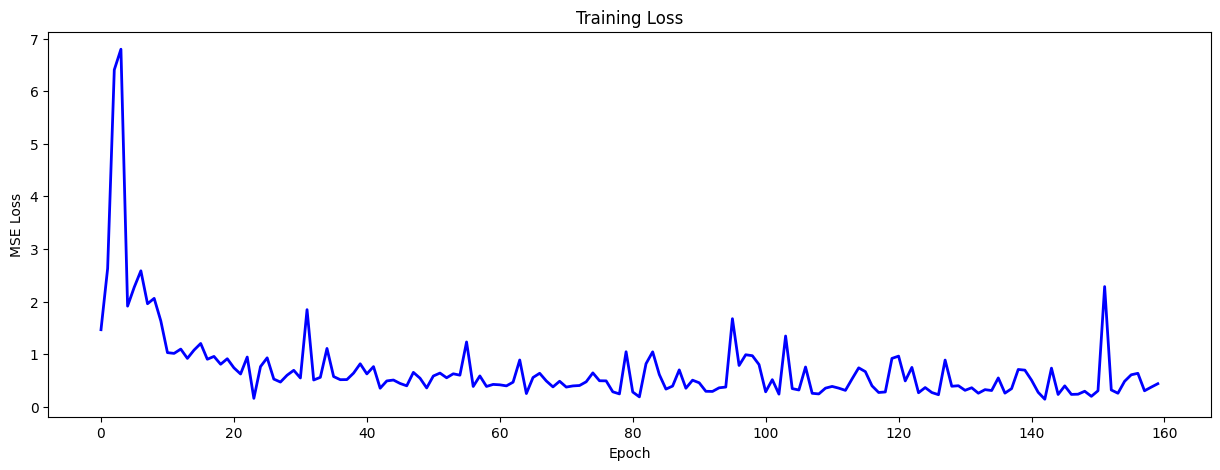

In [29]:
losses_resnet = train_resnet(model_resnet, train_loader_original, optimizer_resnet, criterion_resnet, n_epochs=20)


plt.figure(figsize=(15, 5))
plt.plot(losses_resnet, lw=2,color='blue')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss')
plt.show()

# Save the trained model
PATH = './resnet.pth'
torch.save(model_resnet.state_dict(), PATH)

In [30]:
# load the model 
model_resnet.load_state_dict(torch.load('resnet.pth')) 

# Test the ResNet model
test_resnet(model_resnet, test_loader_original)

C:\Users\gabri\AppData\Local\Temp\ipykernel_25268\439065298.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_resnet.load_state_dict(torch.load('resnet.pth'))


Accuracy of the network on test images with ResNet and a slightly modified classifier: 74 %


# Evaluation

In [31]:
def test_accuracy(model, test_loader, device='cpu'):
    """
    Calculate and return the accuracy of the model on the test set.

    Parameters:
    - model: The trained PyTorch model
    - test_loader: DataLoader for the test dataset
    - device: The device ('cpu' or 'cuda') on which the model and data reside

    Returns:
    - accuracy: Overall accuracy of the model on the test set (in percentage)
    """
    correct = 0
    total = 0
    model.eval()  # Set the model to evaluation mode

    with torch.no_grad():  # Disable gradient computation
        for data in test_loader:
            images, labels = data[0].to(device), data[1].to(device)
            images = images.float()
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Compute overall accuracy
    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the test images: {accuracy:.2f} %')
    return accuracy


In [32]:
# Calculate the overall accuracy
print("Model original")
overall_accuracy_original = test_accuracy(model_original, test_loader_original, device=device)

print("\nModel 100")
overall_accuracy_100 = test_accuracy(model_100, test_loader_original, device=device)

print("\nModel 200")
overall_accuracy_200 = test_accuracy(model_200, test_loader_original, device=device)

print("\nModel 300")
overall_accuracy_300 = test_accuracy(model_300, test_loader_original, device=device)

print("\nResNet")
overall_accuracy_resnet = test_accuracy(model_resnet, test_loader_original, device=device)


Model original
Accuracy of the network on the test images: 85.84 %

Model 100
Accuracy of the network on the test images: 84.96 %

Model 200
Accuracy of the network on the test images: 86.73 %

Model 300
Accuracy of the network on the test images: 90.27 %

ResNet
Accuracy of the network on the test images: 81.42 %


In [33]:
def accuracy(model, test_loader, classes, device='cpu'):
    """
    Calculate and print the accuracy for each class.

    Parameters:
    - model: The trained PyTorch model
    - test_loader: DataLoader for the test dataset
    - classes: List of class names
    - device: The device ('cpu' or 'cuda') on which the model and data reside

    Returns:
    - class_accuracies: A dictionary with class names as keys and accuracy percentages as values
    """
    # Switch the model to evaluation mode
    model.eval()

    # Initialize variables for correct and total counts per class
    class_correct = list(0. for _ in range(len(classes)))
    class_total = list(0. for _ in range(len(classes)))

    with torch.no_grad():
        for data in test_loader:
            images, labels = data[0].to(device), data[1].to(device)
            images = images.float()
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels)
            for i in range(len(labels)):
                label = labels[i].item()
                class_correct[label] += c[i].item()
                class_total[label] += 1

    # Compute and print accuracy for each class
    class_accuracies = {}
    for i in range(len(classes)):
        if class_total[i] > 0:  # Check to avoid division by zero
            accuracy = 100 * class_correct[i] / class_total[i]
            print(f'Accuracy of {classes[i]} : {accuracy:.2f} %')
            class_accuracies[classes[i]] = accuracy
        else:
            print(f'Accuracy of {classes[i]} : No samples available')
            class_accuracies[classes[i]] = None

    return class_accuracies


In [34]:
# Call the accuracy function
print("Model original")
class_accuracies = accuracy(model_original, test_loader_original, classes, device=device)

print("\nModel 100")
class_accuracies_100 = accuracy(model_100, test_loader_original, classes, device=device)

print("\nModel 200")
class_accuracies_200 = accuracy(model_200, test_loader_original, classes, device=device)

print("\nModel 300")
class_accuracies_300 = accuracy(model_300, test_loader_original, classes, device=device)

print("\nModel Resnet and Augmentation")
class_accuracies_resnet = accuracy(model_resnet, test_loader_original, classes, device=device)


Model original
Accuracy of checazzo : 93.10 %
Accuracy of peace : 87.50 %
Accuracy of nice : 89.66 %
Accuracy of nogesture : 74.19 %

Model 100
Accuracy of checazzo : 89.66 %
Accuracy of peace : 87.50 %
Accuracy of nice : 96.55 %
Accuracy of nogesture : 67.74 %

Model 200
Accuracy of checazzo : 82.76 %
Accuracy of peace : 91.67 %
Accuracy of nice : 96.55 %
Accuracy of nogesture : 77.42 %

Model 300
Accuracy of checazzo : 93.10 %
Accuracy of peace : 95.83 %
Accuracy of nice : 93.10 %
Accuracy of nogesture : 80.65 %

Model Resnet and Augmentation
Accuracy of checazzo : 96.55 %
Accuracy of peace : 66.67 %
Accuracy of nice : 65.52 %
Accuracy of nogesture : 93.55 %


In [35]:
from sklearn.metrics import f1_score

def calculate_f1_score(y_true, y_pred, average='weighted'):
    """
    Calculate the F1 score for a classification problem.

    Parameters:
    - y_true: List or array of true class labels
    - y_pred: List or array of predicted class labels
    - average: The averaging method ('micro', 'macro', or 'weighted')

    Returns:
    - f1: F1 score (float)
    """
    f1 = f1_score(y_true, y_pred, average=average)
    print(f"F1 Score ({average}): {f1:.2f}")
    return f1


In [36]:
import torch
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate and visualize results
def evaluate_model(model, test_loader, label_map, device='cpu',average='weighted'):
    """
    Evaluate the model on a test set and visualize the results.

    Parameters:
    - model: The trained PyTorch model
    - test_loader: DataLoader for the test dataset
    - label_map: Dictionary mapping class indices to class names
    - device: The device ('cpu' or 'cuda') on which the model and data reside

    Returns:
    - accuracy: Overall accuracy of the model on the test set (in percentage)
    - conf_matrix: Confusion matrix of the test set predictions
    """
    model.eval()  # Set the model to evaluation mode

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for data in test_loader:
            images, labels = data[0].to(device), data[1].to(device)
            images = images.float()
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())  # Collect predictions
            all_labels.extend(labels.cpu().numpy())  # Collect true labels

    # Compute accuracy
    correct = sum(p == l for p, l in zip(all_preds, all_labels))
    total = len(all_labels)
    accuracy = 100 * correct / total

    #Compute F1 score
    f1 = calculate_f1_score(all_labels, all_preds, average=average)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(all_labels, all_preds)

    # Print accuracy
    print(f"Accuracy of the network on the test set: {accuracy:.2f}%")

    # Visualize confusion matrix
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", 
                xticklabels=label_map.values(), 
                yticklabels=label_map.values())
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    return accuracy, conf_matrix, f1


Model original
F1 Score (weighted): 0.86
Accuracy of the network on the test set: 85.84%


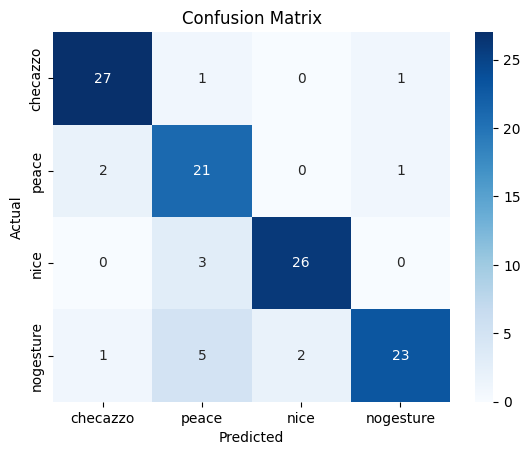


Model 100
F1 Score (weighted): 0.85
Accuracy of the network on the test set: 84.96%


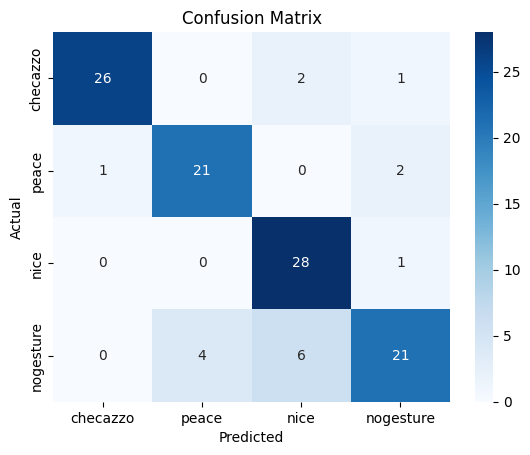


Model 200
F1 Score (weighted): 0.87
Accuracy of the network on the test set: 86.73%


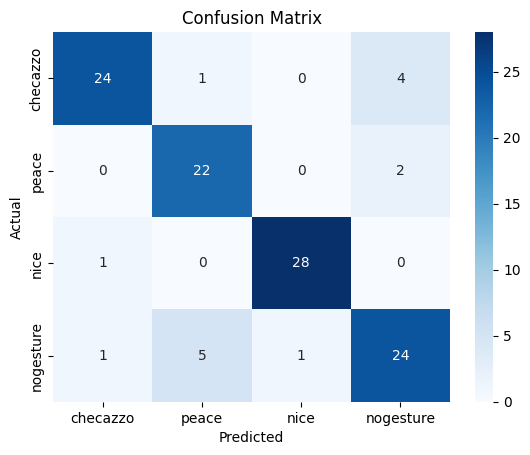


Model 300
F1 Score (weighted): 0.90
Accuracy of the network on the test set: 90.27%


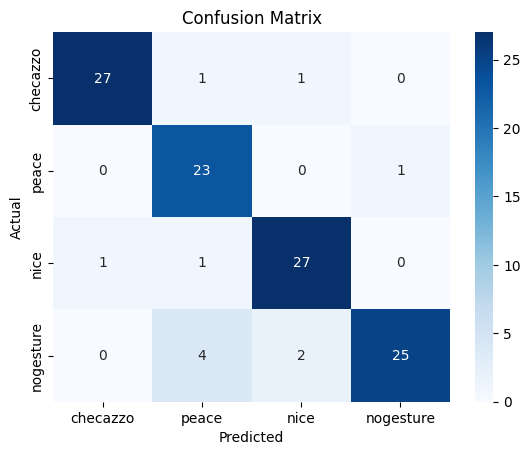


Model Resnet
F1 Score (weighted): 0.81
Accuracy of the network on the test set: 81.42%


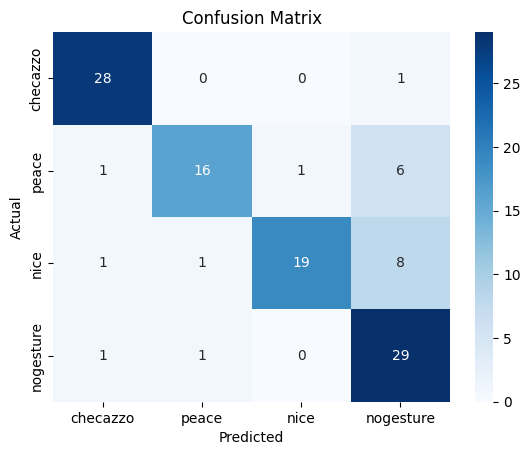

In [37]:
# Define the label map
label_map = {i: class_name for i, class_name in enumerate(classes)}

# Evaluate the model
print("Model original")
overall_accuracy, confusion_mat, f1 = evaluate_model(model_original, test_loader_original, label_map, device=device,average='weighted')

print("\nModel 100")
overall_accuracy_100, confusion_mat_100, f1_100 = evaluate_model(model_100, test_loader_original, label_map, device=device,average='weighted')

print("\nModel 200")
overall_accuracy_200, confusion_mat_200, f1_200 = evaluate_model(model_200, test_loader_original, label_map, device=device,average='weighted')

print("\nModel 300")
overall_accuracy_300, confusion_mat_300, f1_300 = evaluate_model(model_300, test_loader_original, label_map, device=device,average='weighted')

print("\nModel Resnet")
overall_accuracy_resnet, confusion_mat_resnet, f1_resnet = evaluate_model(model_resnet, test_loader_original, label_map, device=device,average='weighted')


# Demo

In [40]:
import cv2
import torch
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

# Load your PyTorch model
model_300 = Net()
model_300.load_state_dict(torch.load('model_300.pth'))
model_300.eval()
# Open webcam
cap = cv2.VideoCapture(0)

# Define preprocessing transforms for grayscale model
preprocess = transforms.Compose([
    transforms.ToPILImage(),                      # Convert OpenCV image (numpy array) to PIL
    transforms.Grayscale(num_output_channels=1),  # Convert RGB to grayscale
    transforms.Resize((128, 128)),                # Resize to model's input size
    transforms.ToTensor()                         # Convert to tensor
])


# Define device (CPU/GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model_original.to(device)

while True:
    try:
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture frame")
            break

        frame = cv2.flip(frame, 1)
        kernel = np.ones((3, 3), np.uint8)

        # Define region of interest
        roi = frame[100:300, 100:300]
        cv2.rectangle(frame, (100, 100), (300, 300), (0, 255, 0), 0)

        # Convert to HSV and create a mask for skin color
        hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
        lower_skin = np.array([0, 20, 70], dtype=np.uint8)
        upper_skin = np.array([20, 255, 255], dtype=np.uint8)
        mask = cv2.inRange(hsv, lower_skin, upper_skin)

        # Preprocess mask
        mask = cv2.dilate(mask, kernel, iterations=4)
        mask = cv2.GaussianBlur(mask, (5, 5), 100)

        # Show the live feed
        cv2.imshow('ROI', mask)
        cv2.imshow('Frame', frame)

        # Capture gesture on pressing a key
        k = cv2.waitKey(5) & 0xFF
        if k == ord('c'):  # Press 'c' to capture and evaluate the gesture
            print("Capturing and evaluating gesture...")
            

            input_image = preprocess(mask)
            input_image = input_image.unsqueeze(0).to(device)  # Add batch dimension and move to device
            
            # Predict gesture
            with torch.no_grad():
                print(f"Input shape: {input_image.shape}")  # Should be [1, 1, 128, 128] for grayscale or [1, 3, 128, 128] for RGB
                prediction = model(input_image)
                print(prediction)
            label = torch.argmax(prediction, dim=1).item()  # Get the predicted class label

            # Map labels to gestures
            gestures = {0: "Checazzo", 1: "Peace", 2: "Nice", 3: "NO Gesture"}
            gesture_text = gestures.get(label, "Unknown Gesture")

            # Display the result in the console
            print(f"Predicted Gesture: {gesture_text}")

        # Exit on pressing 'ESC'
        if k == 27:  # Press 'ESC' to quit
            break

    except Exception as e:
        print(f"Error: {e}")
        pass

# Release resources
cv2.destroyAllWindows()
cap.release()


C:\Users\gabri\AppData\Local\Temp\ipykernel_25268\198178026.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_300.load_state_dict(torch.load('model_300.pth'))


Capturing and evaluating gesture...
Input shape: torch.Size([1, 1, 128, 128])
tensor([[ 52.3620, -52.5215,  -5.2306, -19.4794]])
Predicted Gesture: Checazzo
Capturing and evaluating gesture...
Input shape: torch.Size([1, 1, 128, 128])
tensor([[ 85.5868, -83.1530, -13.3626, -27.4319]])
Predicted Gesture: Checazzo
Capturing and evaluating gesture...
Input shape: torch.Size([1, 1, 128, 128])
tensor([[ 55.1701, -55.6169,  -4.7093, -21.2553]])
Predicted Gesture: Checazzo
Capturing and evaluating gesture...
Input shape: torch.Size([1, 1, 128, 128])
tensor([[ 70.1451, -69.7026,  -8.1825, -24.9791]])
Predicted Gesture: Checazzo
Capturing and evaluating gesture...
Input shape: torch.Size([1, 1, 128, 128])
tensor([[ 67.8813, -67.6794,  -7.4511, -24.5967]])
Predicted Gesture: Checazzo
Capturing and evaluating gesture...
Input shape: torch.Size([1, 1, 128, 128])
tensor([[ 58.7243, -58.7396,  -6.0847, -21.6228]])
Predicted Gesture: Checazzo
Capturing and evaluating gesture...
Input shape: torch.Siz

In [ ]:
import torch
import cv2
import numpy as np
import torchvision.transforms as transforms
from PIL import Image
from torchvision import models
import torch
import torch.nn as nn


# Assuming your model is defined as model_300
def classify_grayscale_image(input_image_rgb, model, device):
    """
    Classifies an RGB image after converting it to grayscale.

    Parameters:
    - input_image_rgb: A numpy array of shape (H, W, 3), representing the RGB image.
    - model: The trained PyTorch model for classification.
    - device: The device (CPU or GPU) where the model is loaded.

    Returns:
    - label: The predicted gesture label (0, 1, 2, etc.).
    - gesture_text: The predicted gesture name.
    """

    # Step 1: Convert RGB to Grayscale
    input_image_gray = cv2.cvtColor(input_image_rgb, cv2.COLOR_BGR2GRAY)  # Convert RGB to Grayscale
    
    # Step 2: Preprocess the grayscale image
    preprocess = transforms.Compose([
        transforms.ToPILImage(),                      # Convert numpy array to PIL image
        transforms.Grayscale(num_output_channels=1),  # Ensure the image is single channel (grayscale)
        transforms.Resize((128, 128)),                # Resize to model's input size
        transforms.ToTensor()                         # Convert to tensor
    ])

    # Step 3: Apply transformations
    input_image = preprocess(input_image_gray)
    input_image = input_image.unsqueeze(0).to(device)  # Add batch dimension and move to device

    # Step 4: Predict using the model
    with torch.no_grad():
        prediction = model(input_image)
    
    # Step 5: Get the predicted label (class index)
    label = torch.argmax(prediction, dim=1).item()

    # Step 6: Map label to gesture
    gestures = {0: "Gesture 0", 1: "Gesture 1", 2: "Gesture 2", 3: "No Gesture"}  # Customize your labels
    gesture_text = gestures.get(label, "Unknown Gesture")

    return label, gesture_text


# Example usage:
# Load the model
#model_300 = Net()  # Assuming Net() is your model architecture
#model_300.load_state_dict(torch.load('model_300.pth'))
#model_300.eval()


device = "cuda" if torch.cuda.is_available() else "cpu"
num_classes = 4  # For CIFAR-10

# Load ResNet18
model_resnet = models.resnet18(pretrained=True).to(device)

# Modify the first convolutional layer to accept 1 channel instead of 3
# Get the original first convolutional layer
original_conv1 = model_resnet.conv1

# Create a new convolutional layer with 1 input channel
model_resnet.conv1 = nn.Conv2d(
    in_channels=1,  # Grayscale images have 1 channel
    out_channels=original_conv1.out_channels,
    kernel_size=original_conv1.kernel_size,
    stride=original_conv1.stride,
    padding=original_conv1.padding,
    bias=original_conv1.bias is not None
)

# Copy the pretrained weights from the original convolutional layer
if original_conv1.weight.shape[1] == 3:  # If using pretrained RGB weights
    model_resnet.conv1.weight.data = original_conv1.weight.data.mean(dim=1, keepdim=True)

# Prevent the trained weights from being modified
for name, param in model_resnet.named_parameters():
  if 'fc' not in name: # Adjust this condition to target specific layers if needed
    param.requires_grad = False


# Compute the input feature size for the first fc layer
num_ftrs_resnet = model_resnet.fc.in_features
print(num_ftrs_resnet)

# Create a new set of fc layers
classifier = [
    nn.Linear(in_features=num_ftrs_resnet, out_features=256).to(device),
    nn.ReLU(inplace=True).to(device),
    nn.Dropout(p=0.3, inplace=False).to(device),
    nn.Linear(in_features=256, out_features=4, bias=True).to(device)
]

model_resnet.fc = nn.Sequential(*classifier).to(device) # Replace the model classifier



# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#model_300.to(device)

# Capture image or load your input image (for example from webcam)
input_image_rgb = cv2.imread("test.jpg")  # Replace with your image path or webcam capture

# Classify the image
label, gesture_text = classify_grayscale_image(input_image_rgb, model_resnet, device)
print(f"Predicted Gesture: {gesture_text} (Label: {label})")


512
Predicted Gesture: Gesture 1 (Label: 1)
